In [ ]:
from google.colab import drive
import pandas as pd

# Monta tu Google Drive
drive.mount('/content/drive')

train_datafile = '/content/drive/MyDrive/Profundo/train.csv'
validation_datafile = '/content/drive/MyDrive/Profundo/val.csv'
test_datafile = '/content/drive/MyDrive/Profundo/test.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_df = pd.read_csv(train_datafile)
train_data_df.head()

,_unit_id,_trusted_judgments,comment,antagonize,antagonize:confidence,condescending,condescending:confidence,dismissive,dismissive:confidence,generalisation,generalisation:confidence,generalisation_unfair,generalisation_unfair:confidence,healthy,healthy:confidence,hostile,hostile:confidence,sarcastic,sarcastic:confidence
0,2319157561,4,"Three marriages, several bankrupt periods, inh...",0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,0.7578,0,0.7565,0,1.0000
1,1739464982,4,The sense of entitlement among high school 'jo...,0,0.7634,0,0.7634,0,0.7634,0,1.0000,0.0,1.0,1,0.7634,0,0.7634,0,0.7634
2,1739457583,5,So what? He was just stating the obvious.,0,0.8121,0,0.5928,0,0.8043,0,1.0000,0.0,1.0,1,0.6163,0,1.0000,0,1.0000
3,2319156950,40,"If one is a Con, why yes, one would honk. Loud...",0,0.8508,0,0.8867,0,0.9239,0,0.8863,0.0,1.0,1,0.8508,0,0.9641,0,0.8868
4,2327196492,3,Ooohhh... It's Wendy Whiner... making sure to ...,0,1.0000,0,1.0000,0,1.0000,0,1.0000,0.0,1.0,1,1.0000,0,1.0000,0,1.0000


In [ ]:
import torch
from transformers import pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

device = 0 if torch.cuda.is_available() else -1

# Cargar el pipeline con batch_size especificado
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment",
    batch_size=128  # Ajusta el tamaño del lote según tus recursos
)

# Load the data into a pandas DataFrame first
train_data_df = pd.read_csv(train_datafile)

# Now you can analyze sentiments
# Ensure all elements in the list are strings before passing to the pipeline
results = sentiment_pipeline([str(text) for text in train_data_df['comment'].tolist()])

# Extraer etiquetas y puntuaciones
sentiment_labels = [result['label'] for result in results]
sentiment_scores = [result['score'] for result in results]

# Load the data into a pandas DataFrame
# Use the original path instead of the variable which may have been reassigned
train_data_df = pd.read_csv('/content/drive/MyDrive/Profundo/train.csv')

# Function to analyze sentiment in batches
def analyze_sentiment_batch(sentences, batch_size=32):
    """Analyzes sentiment of a list of sentences in batches."""
    sentiment_labels = []
    sentiment_scores = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i : i + batch_size]  # Get current batch
        # Ensure all elements in the batch are strings
        batch = [str(text) for text in batch]
        results = sentiment_pipeline(batch)  # Process batch
        for result in results:
            sentiment_labels.append(result['label'])
            sentiment_scores.append(result['score'])
    return sentiment_labels, sentiment_scores

# Apply sentiment analysis to the 'comment' column in batches
sentiment_labels, sentiment_scores = analyze_sentiment_batch(train_data_df['comment'].tolist())

# Create DataFrame with the results
data_sentiment = pd.DataFrame({
    'text': train_data_df['comment'],
    'category': train_data_df['healthy'],
    'sentiment_label': [label.replace('LABEL_0', 'Negative').replace('LABEL_1', 'Neutral').replace('LABEL_2', 'Positive') for label in sentiment_labels],
    'sentiment_score': sentiment_scores
})

data_sentiment

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,text,category,sentiment_label,sentiment_score
0,"Three marriages, several bankrupt periods, inh...",1,Negative,0.471712
1,The sense of entitlement among high school 'jo...,1,Negative,0.630599
2,So what? He was just stating the obvious.,1,Neutral,0.729137
3,"If one is a Con, why yes, one would honk. Loud...",1,Neutral,0.632940
4,Ooohhh... It's Wendy Whiner... making sure to ...,1,Negative,0.821649
...,...,...,...,...
35498,"Okay, make that ""write a book"" Fingers don't a...",1,Negative,0.593498
35499,"It was Americans in Alberta, not the governmen...",1,Neutral,0.506365
35500,Whiner: Your air force consists of paper power...,1,Neutral,0.623016
35501,OUTSTANDING EDITORIAL!,1,Positive,0.502461


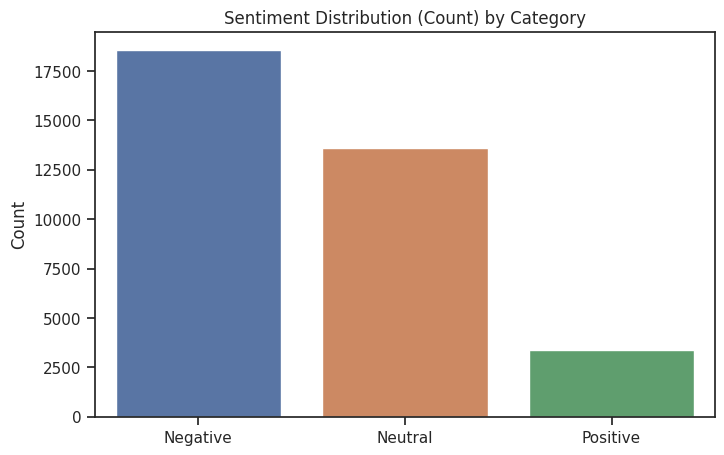

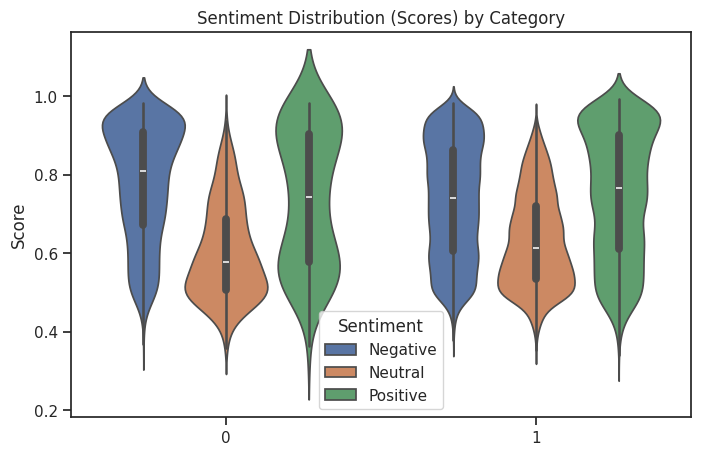

Unique categories: [1 0]


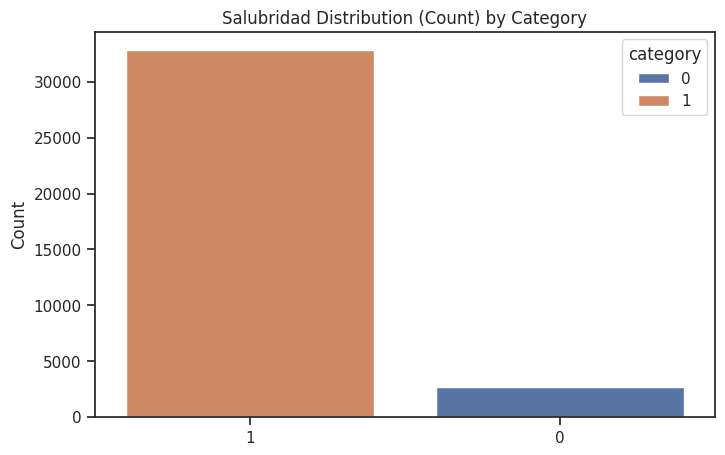

In [ ]:
# Gráfico de distribución de sentimientos
plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks")
sns.countplot(data=data_sentiment, x='sentiment_label', hue='sentiment_label', order=['Negative', 'Neutral', 'Positive'])
plt.title('Sentiment Distribution (Count) by Category')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Crear un gráfico de violín para mostrar la distribución de las puntuaciones de sentimiento por categoría
plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks")
sns.violinplot(data=data_sentiment, x='category', y='sentiment_score', hue='sentiment_label')
plt.title('Sentiment Distribution (Scores) by Category')
plt.xlabel('')
plt.ylabel('Score')
plt.legend(title='Sentiment')
plt.show()

# Gráfico de salubridad
plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks")

# Get the unique values from the 'category' column of your DataFrame
unique_categories = data_sentiment['category'].unique()

# Print these unique values for inspection:
print("Unique categories:", unique_categories)

# Use the actual category values in the order argument
sns.countplot(data=data_sentiment, x='category', hue='category', order=unique_categories)
plt.title('Salubridad Distribution (Count) by Category')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

# Análisis LLMs

In [ ]:
import getpass
import google.generativeai as genai
import pandas as pd
import time
from tqdm import tqdm
import random

# Pedir clave de API
api_key = getpass.getpass("Introduce tu clave de API de Gemini: ")
genai.configure(api_key=api_key)

# Usar el modelo más eficiente con menor restricción de cuota
modelo_usar = "models/gemini-1.5-flash-002"  # Prueba otros modelos si el error persiste

# Inicializar el modelo
model = genai.GenerativeModel(modelo_usar)

def clasificar_lote(textos, max_retries=3):
    """
    Clasifica un lote de textos como "Healthy" o "Unhealthy" usando Gemini con reintentos.
    """
    retries = 0
    while retries < max_retries:
        try:
            prompt = f"""
            Clasifica los siguientes textos como "Healthy" o "Unhealthy". Devuelve las clasificaciones en orden, separadas por comas.

            {chr(10).join([f"{t}" for t in textos])}
            """
            response = model.generate_content(prompt)

            # Extraer la respuesta y dividirla en una lista
            clasificaciones = response.text.strip().split(", ")

            # Validar las respuestas y corregir posibles errores
            return [
                c if c in ["Healthy", "Unhealthy"] else "UNKNOWN"
                for c in clasificaciones
            ]

        except Exception as e:
            print(f"Error al clasificar el lote: {e}. Reintentando...")
            retries += 1
            time.sleep(2 ** retries + random.random())  # Retroceso exponencial
    return ["UNKNOWN"] * len(textos)


# Cargar datos
train_data_df = pd.read_csv("/content/drive/MyDrive/Profundo/train.csv")  # Ajusta la ruta del archivo CSV

# Configurar tamaño del lote y tiempo de espera
batch_size = 20  # Aumentado para procesar más textos por llamada
clasificaciones_gemini = []

# Procesar en lotes con manejo de errores
for i in tqdm(range(0, len(train_data_df), batch_size), desc="Clasificando en lotes"):
    batch_texts = train_data_df['comment'].iloc[i:i+batch_size].tolist()
    batch_clasificaciones = clasificar_lote(batch_texts)
    clasificaciones_gemini.extend(batch_clasificaciones)
    # Assign classifications to the correct slice of the DataFrame column
    # Ensure the slice is within the bounds of batch_clasificaciones
    train_data_df.loc[i:i + len(batch_clasificaciones) - 1, 'clasificacion_gemini'] = batch_clasificaciones
    # Guardar resultados parciales después de cada lote
    train_data_df.to_csv("datos_clasificados_parcial.csv", index=False)

# Guardar el resultado en un nuevo archivo
train_data_df.to_csv("datos_clasificados.csv", index=False)

# Mostrar los primeros resultados
print(train_data_df[['comment', 'clasificacion_gemini']].head())

                                              comment  healthy  \
0   Three marriages, several bankrupt periods, inh...  Healthy   
20  What crime? Selling a video from your own came...  Healthy   
21               Wolves seldom, if ever chase humans.  Healthy   
22  Progressives ALWAYS go over the top. They cann...  Healthy   
23  Yep, I've thought that god's promise not to se...  Healthy   

   clasificacion_gemini  
0               UNKNOWN  
20              Healthy  
21              Healthy  
22            Unhealthy  
23            Unhealthy  
              precision    recall  f1-score   support

     Healthy       0.96      0.12      0.21     23918
   Unhealthy       0.08      0.94      0.14      1902

    accuracy                           0.18     25820
   macro avg       0.52      0.53      0.18     25820
weighted avg       0.89      0.18      0.20     25820



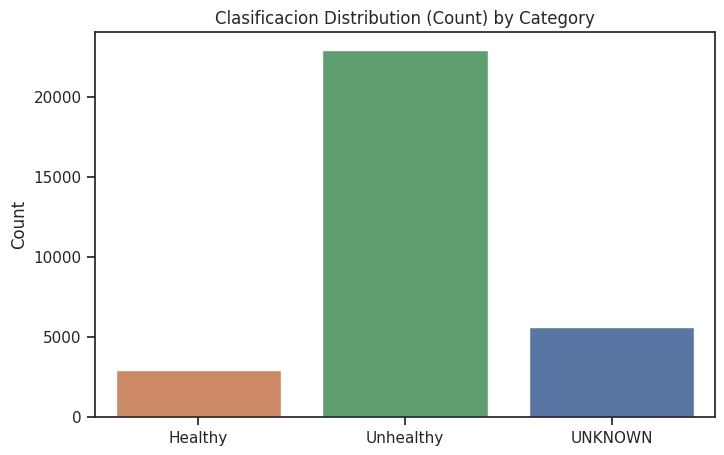

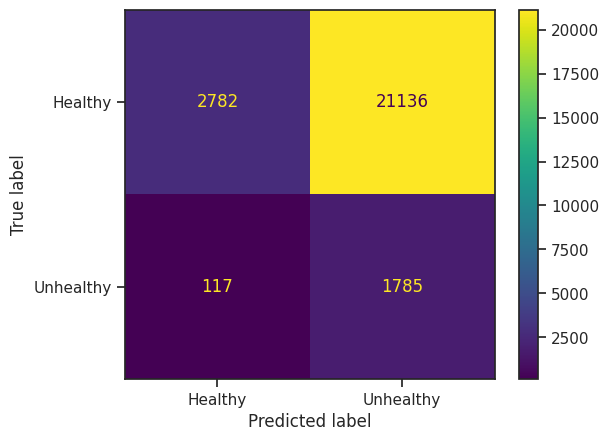

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos_clasificados = pd.read_csv('/content/drive/MyDrive/Profundo/datos_clasificados.csv')

# Ensure both columns have consistent string data type
datos_clasificados.dropna(inplace=True)
datos_clasificados['healthy'] = datos_clasificados['healthy'].astype(str)  # Keep as string
datos_clasificados['healthy'] = datos_clasificados['healthy'].replace({'1': 'Healthy', '0': 'Unhealthy'}) # Replace if needed
datos_clasificados['clasificacion_gemini'] = datos_clasificados['clasificacion_gemini'].astype(str) # Force to string

print(datos_clasificados[['comment', 'healthy', 'clasificacion_gemini']].head())

plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks")
sns.countplot(data=datos_clasificados, x='clasificacion_gemini', hue='clasificacion_gemini', order=['Healthy', 'Unhealthy', 'UNKNOWN']) # Include 'UNKNOWN' in the order
plt.title('Clasificacion Distribution (Count) by Category')
plt.xlabel('')
plt.ylabel('Count')

# Filter out rows with 'UNKNOWN' before calculating metrics
filtered_data = datos_clasificados[datos_clasificados['clasificacion_gemini'] != 'UNKNOWN']

print(classification_report(
    filtered_data['healthy'],
    filtered_data['clasificacion_gemini']))

cm = confusion_matrix(
    filtered_data['healthy'],
    filtered_data['clasificacion_gemini'])

# Include 'UNKNOWN' in display_labels if it exists in the data
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Unhealthy'])
disp.plot()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


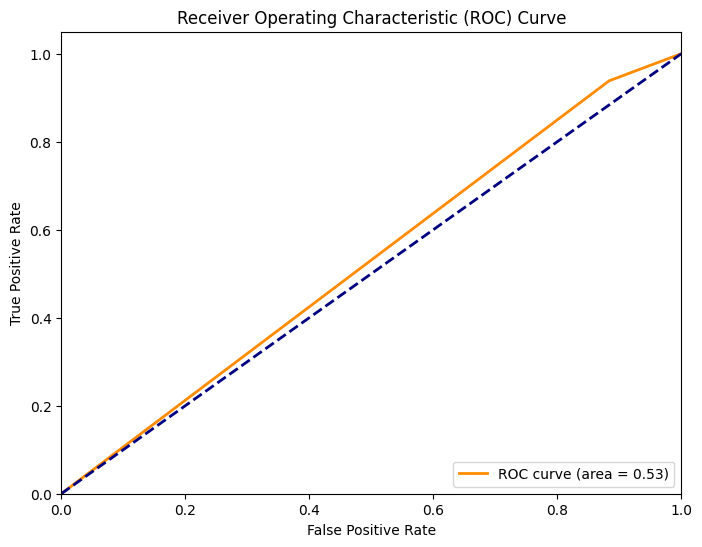

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

drive.mount('/content/drive')

# Carga los datos
datos_clasificados = pd.read_csv('/content/drive/MyDrive/datos_clasificados.csv')

# Asegúrate de que las columnas 'healthy' y 'clasificacion_gemini' sean del tipo correcto
datos_clasificados.dropna(inplace=True)
datos_clasificados['healthy'] = datos_clasificados['healthy'].astype(str).replace({'1': 'Healthy', '0': 'Unhealthy'})
datos_clasificados['clasificacion_gemini'] = datos_clasificados['clasificacion_gemini'].astype(str)

# Filtrar los datos para excluir la clase 'UNKNOWN'
filtered_data = datos_clasificados[datos_clasificados['clasificacion_gemini'] != 'UNKNOWN']

# Codificar las etiquetas de clase en valores numéricos (0 y 1)
le = LabelEncoder()
y_true = le.fit_transform(filtered_data['healthy'])
y_pred_prob = le.transform(filtered_data['clasificacion_gemini'])


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

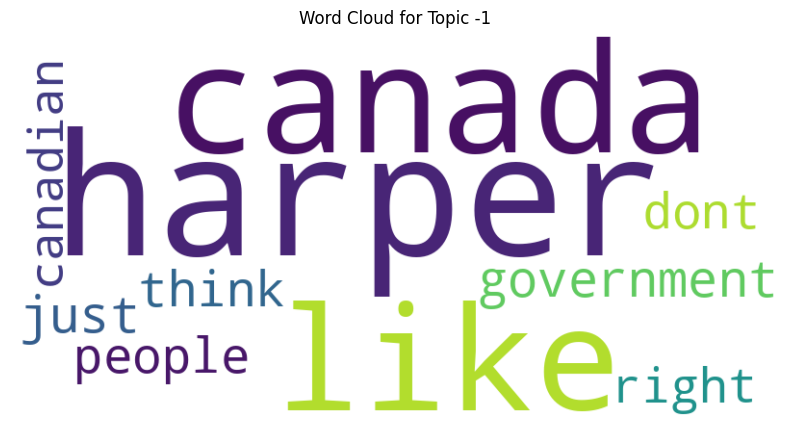

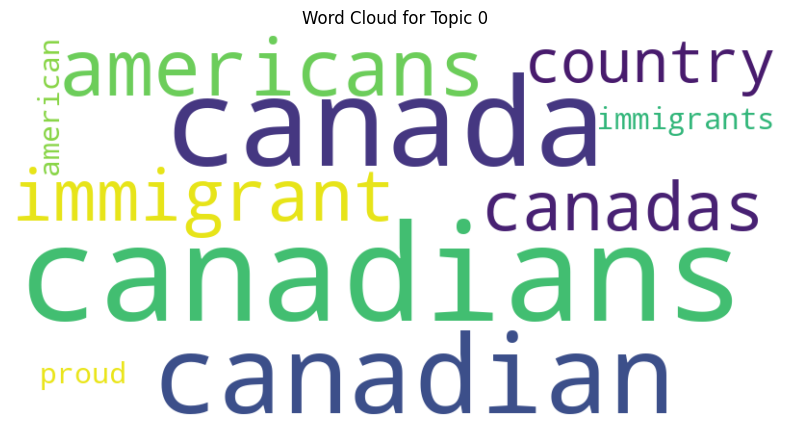

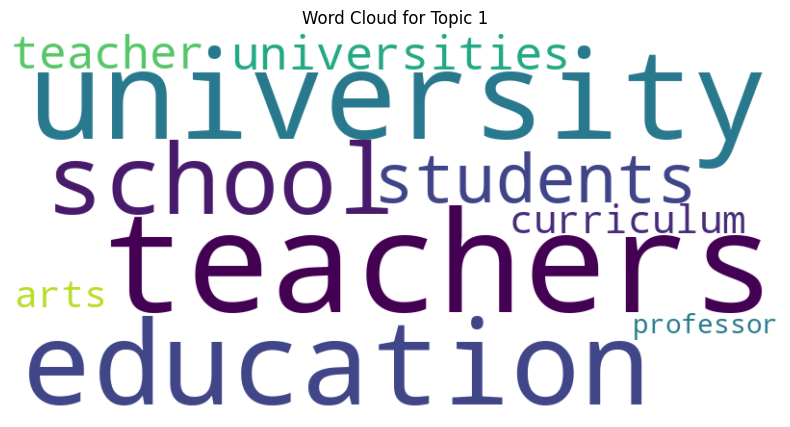

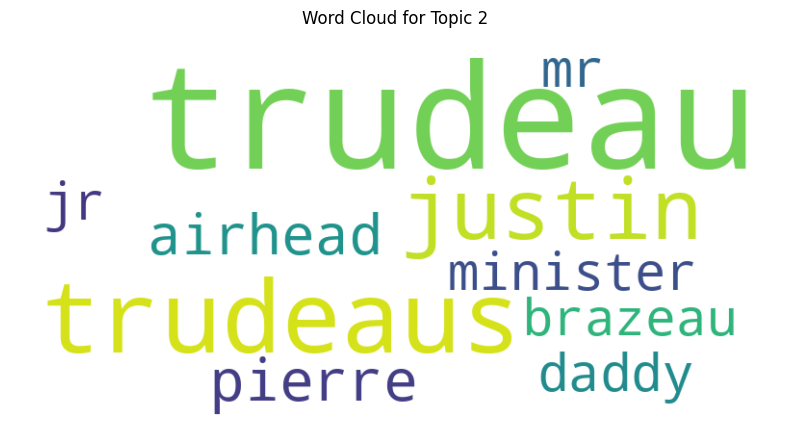

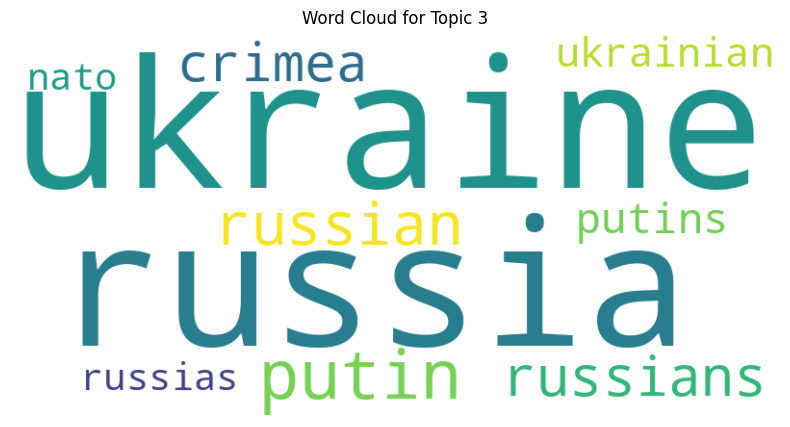

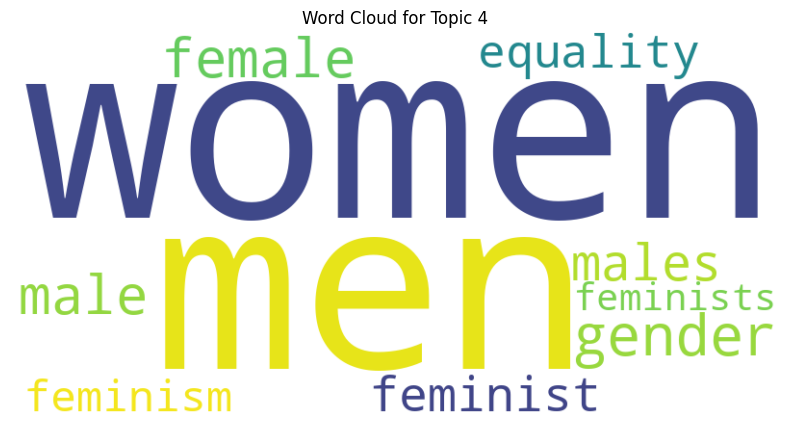

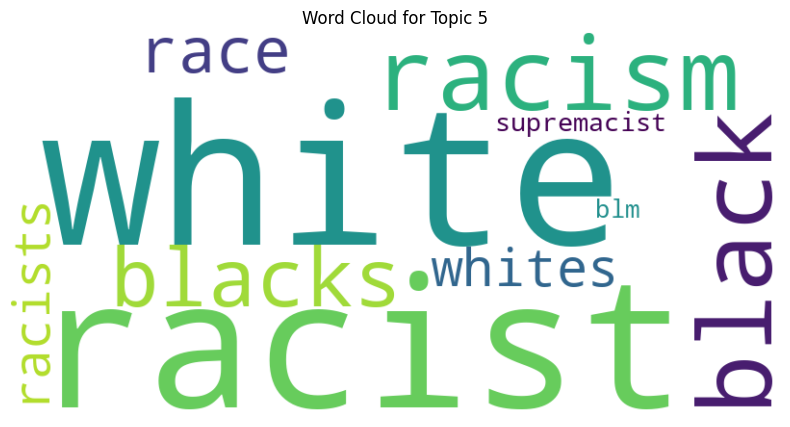

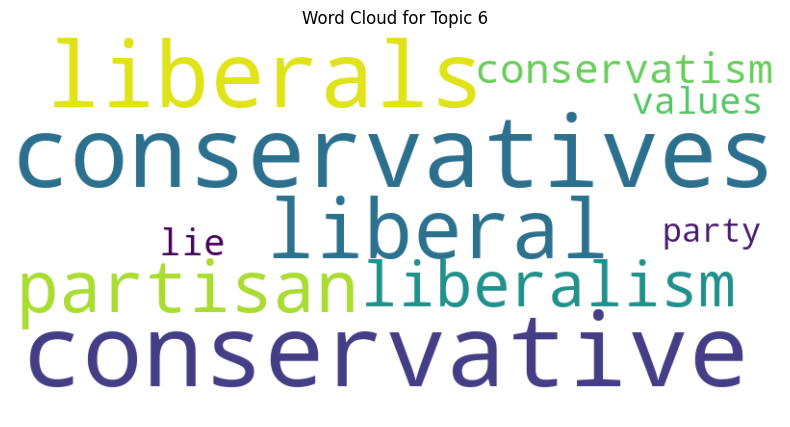

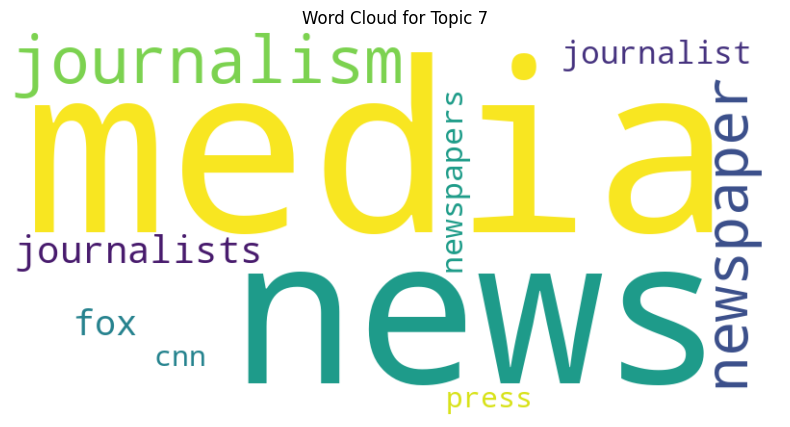

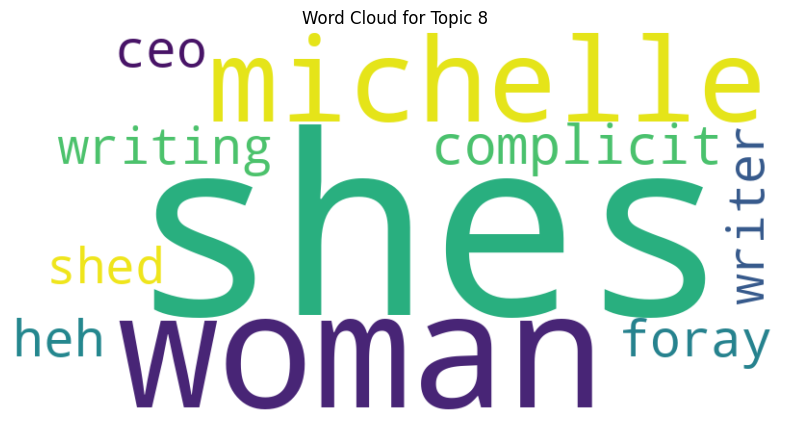

In [ ]:
!pip install bertopic
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

# Assuming 'datos_clasificados' is already loaded as in your previous cells
datos_clasificados = pd.read_csv('/content/drive/MyDrive/Profundo/datos_clasificados.csv')
docs = datos_clasificados['comment'].tolist()

# Convert the 'comment' column to strings before processing
datos_clasificados['comment'] = datos_clasificados['comment'].astype(str)

docs = datos_clasificados['comment'].tolist()

# Create and train the topic model (this part was missing)
topic_model = BERTopic(
    vectorizer_model=CountVectorizer(stop_words="english"),
    language="english",
    calculate_probabilities=True)
topics, probabilities = topic_model.fit_transform(docs)


# Now you can use the topic_model to generate word clouds
for topic_id in topic_model.get_topic_info()['Topic'][:10]:  # Top 10 topics
    words = topic_model.get_topic(topic_id)  # Get words for the topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.show()

In [ ]:
!pip install bertopic cuml
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer # Usando TF-IDF
import random

#Carga del dataset
datos_clasificados = pd.read_csv('/content/drive/MyDrive/Profundo/datos_clasificados.csv')
datos_clasificados['comment'] = datos_clasificados['comment'].astype(str)
docs = datos_clasificados['comment'].tolist()

# 1. Reducir el número de tópicos y usar TF-IDF
topic_model = BERTopic(
    vectorizer_model=TfidfVectorizer(stop_words="english"),
    language="english",
    calculate_probabilities=True,
    nr_topics=10,  # Limitar a 10 tópicos
    embedding_model="all-MiniLM-L6-v2", # Usar un modelo de embedding compatible con GPU
    low_memory=True # Reducir el consumo de RAM
)

# 2. y 3. Reducir el tamaño del dataset (opcional, descomenta si es necesario)

docs_sample = random.sample(docs, int(len(docs) * 0.1))
topics, probabilities = topic_model.fit_transform(docs_sample)

# 4. Usando GPU (configurado en el modelo)

# Entrenar el modelo
topics, probabilities = topic_model.fit_transform(datos_clasificados['comment'].tolist())

# Obtener información de los tópicos
topic_info = topic_model.get_topic_info()

# 5. Guardar el modelo (opcional, descomenta si es necesario)
topic_model.save("my_topic_model")


# ... (resto del código) ...

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
Failed to build cuml
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (cuml)


2025-03-27 10:28:35,614 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
document_info = topic_model.get_document_info(docs)
document_info

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"Three marriages, several bankrupt periods, inh...",2,2_climate_tax_change_science,"[climate, tax, change, science, oil, warming, ...","[Both terms are used. Global warming, or in th...",climate - tax - change - science - oil - warmi...,1.000000,False
1,The sense of entitlement among high school 'jo...,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.947051,False
2,So what? He was just stating the obvious.,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.050053,False
3,"If one is a Con, why yes, one would honk. Loud...",0,0_harper_just_like_trudeau,"[harper, just, like, trudeau, people, party, c...","[Actually, Ford Nation are the people who will...",harper - just - like - trudeau - people - part...,0.714365,False
4,Ooohhh... It's Wendy Whiner... making sure to ...,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.567709,False
...,...,...,...,...,...,...,...,...
35498,"Okay, make that ""write a book"" Fingers don't a...",0,0_harper_just_like_trudeau,"[harper, just, like, trudeau, people, party, c...","[Actually, Ford Nation are the people who will...",harper - just - like - trudeau - people - part...,0.693344,False
35499,"It was Americans in Alberta, not the governmen...",-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.668126,False
35500,Whiner: Your air force consists of paper power...,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.844902,False
35501,OUTSTANDING EDITORIAL!,0,0_harper_just_like_trudeau,"[harper, just, like, trudeau, people, party, c...","[Actually, Ford Nation are the people who will...",harper - just - like - trudeau - people - part...,0.471928,False


In [ ]:
document_info['healthy'] = datos_clasificados['clasificacion_gemini']
document_info

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,healthy
0,"Three marriages, several bankrupt periods, inh...",2,2_climate_tax_change_science,"[climate, tax, change, science, oil, warming, ...","[Both terms are used. Global warming, or in th...",climate - tax - change - science - oil - warmi...,1.000000,False,UNKNOWN
1,The sense of entitlement among high school 'jo...,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.947051,False,NaN
2,So what? He was just stating the obvious.,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.050053,False,NaN
3,"If one is a Con, why yes, one would honk. Loud...",0,0_harper_just_like_trudeau,"[harper, just, like, trudeau, people, party, c...","[Actually, Ford Nation are the people who will...",harper - just - like - trudeau - people - part...,0.714365,False,NaN
4,Ooohhh... It's Wendy Whiner... making sure to ...,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.567709,False,NaN
...,...,...,...,...,...,...,...,...,...
35498,"Okay, make that ""write a book"" Fingers don't a...",0,0_harper_just_like_trudeau,"[harper, just, like, trudeau, people, party, c...","[Actually, Ford Nation are the people who will...",harper - just - like - trudeau - people - part...,0.693344,False,UNKNOWN
35499,"It was Americans in Alberta, not the governmen...",-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.668126,False,UNKNOWN
35500,Whiner: Your air force consists of paper power...,-1,-1_harper_canada_like_just,"[harper, canada, like, just, people, don, thin...",[I am in Alberta and don't take any offence to...,harper - canada - like - just - people - don -...,0.844902,False,UNKNOWN
35501,OUTSTANDING EDITORIAL!,0,0_harper_just_like_trudeau,"[harper, just, like, trudeau, people, party, c...","[Actually, Ford Nation are the people who will...",harper - just - like - trudeau - people - part...,0.471928,False,UNKNOWN


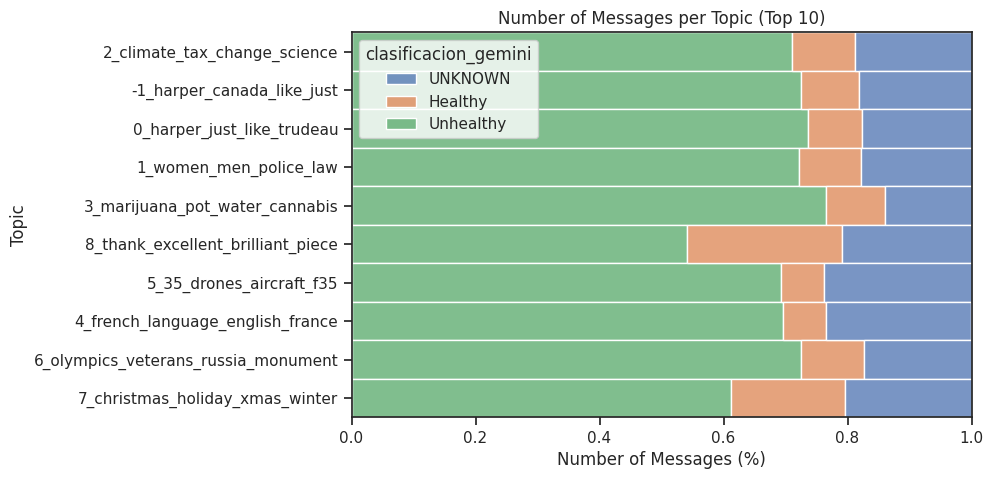

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para excluir la clase 'UNKNOWN'
# Limitar a los primeros 10 temas
top_10_topics = topic_info['Topic'][:10].tolist()

# Ensure 'clasificacion_gemini' is added BEFORE filtering
document_info['clasificacion_gemini'] = datos_clasificados['clasificacion_gemini']
document_info_top_10 = document_info[document_info['Topic'].isin(top_10_topics)]

# Crear gráfico
plt.figure(figsize=(8, 5))
sns.set_theme(style="ticks")
sns.histplot(data=document_info_top_10, y='Name', hue='clasificacion_gemini', multiple="fill", discrete=True)
plt.title('Number of Messages per Topic (Top 10)')
plt.ylabel('Topic')
plt.xlabel('Number of Messages (%)')
plt.show()